<a href="https://colab.research.google.com/github/xaviermarcio/estudos-inteligencia-artificial/blob/main/03_arvore-decisao/arvore-decisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Árvore de Decisão — Exemplo Didático (Classificação)
**Objetivo:** treinar e explicar uma árvore de decisão no dataset *Iris*, avaliar métricas, visualizar a árvore, analisar importâncias dos atributos e estudar rapidamente o efeito de `max_depth`.

In [ ]:
# (Opcional) Descomente no Colab se precisar instalar/atualizar pacotes
# !pip install -U scikit-learn matplotlib pandas numpy

In [1]:
# Imports principais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 1) Carregar e inspecionar o dataset

In [ ]:
# Carregamos o clássico dataset Iris (3 classes de flores)

In [2]:
iris = load_iris(as_frame=True)
x = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

print(f'Feature names: {feature_names}')
print(f'Target names: {target_names}')

#Visualizar
display(x.head())
display(y.head())

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


,target
0,0
1,0
2,0
3,0
4,0


## 2) Separar treino e teste

In [3]:
# Dividimos os dados em treino e teste para avaliar generalização
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
print("Treino:", X_train.shape, y_train.shape)
print("Teste:", X_test.shape, y_test.shape)

Treino: (105, 4) (105,)
Teste: (45, 4) (45,)


## 3) Treinar uma árvore de decisão básica

In [4]:
# Criamos o classificador com hiperparâmetros padrão
# Dica: controle overfitting com max_depth, min_samples_leaf, ccp_alpha, etc.

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

#Avaliação simples no teste

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia no teste: {acc:.3f}')
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred, target_names=target_names))

Acurácia no teste: 0.933

Relatório de Classificação:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.80      0.89        15
   virginica       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



##4) Matriz de confusão

Matriz de confusão (linhas = verdade, colunas = predito):
 [[15  0  0]
 [ 0 12  3]
 [ 0  0 15]]


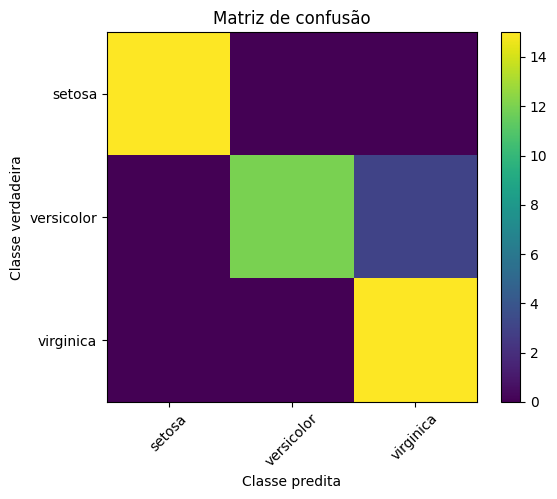

In [7]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusão (linhas = verdade, colunas = predito):\n", cm)

#Visualização simples da matrix(sem estilos específicos)
plt.figure()
plt.imshow(cm, interpolation='nearest')
plt.title("Matriz de confusão")
plt.xlabel("Classe predita")
plt.ylabel("Classe verdadeira")
plt.colorbar()
tick_marks = np.arange(len(target_names))
plt.xticks(tick_marks, target_names, rotation=45)
plt.yticks(tick_marks, target_names)
plt.show()


##5) Visualizar a árvore

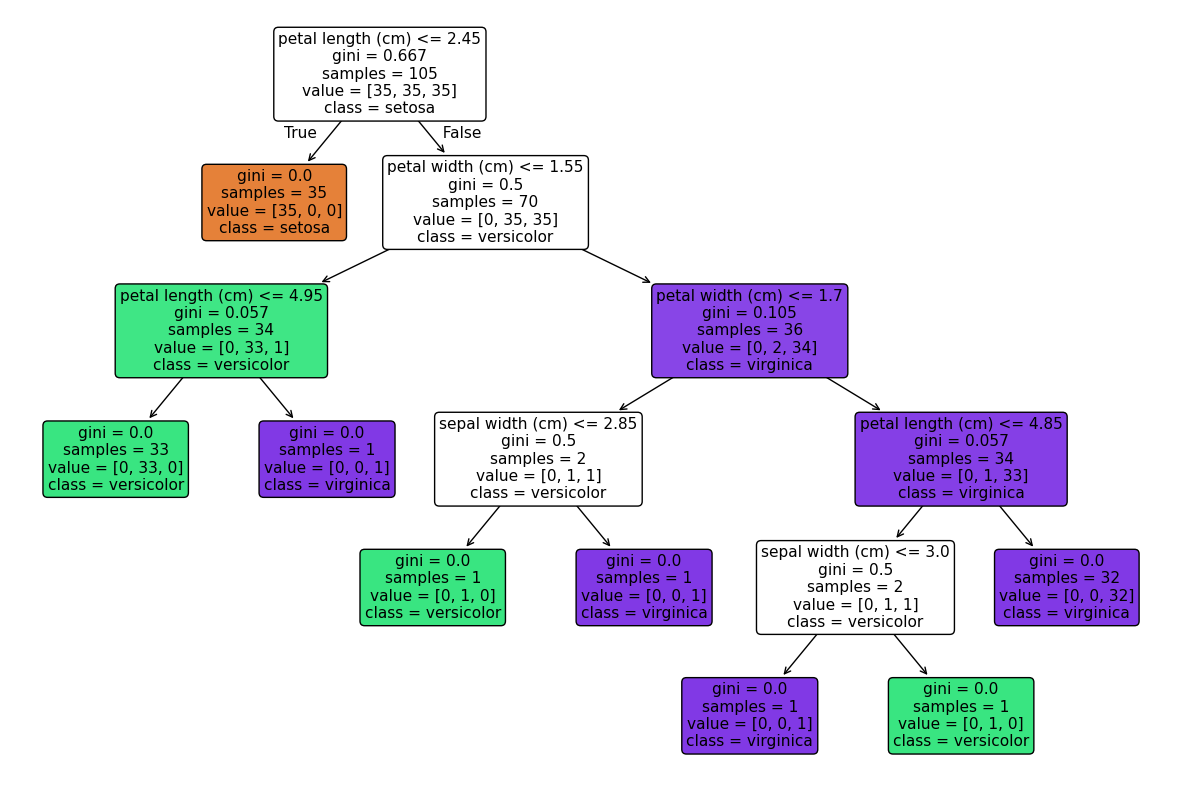

In [11]:
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, rounded=True, feature_names=feature_names, class_names=target_names)
plt.show()

##6) Importância dos atributos

,Feature,Importance
2,petal length (cm),0.541176
3,petal width (cm),0.430252
1,sepal width (cm),0.028571
0,sepal length (cm),0.000000


([0, 1, 2, 3],
 [Text(0, 0, 'petal length (cm)'),
  Text(1, 0, 'petal width (cm)'),
  Text(2, 0, 'sepal width (cm)'),
  Text(3, 0, 'sepal length (cm)')])

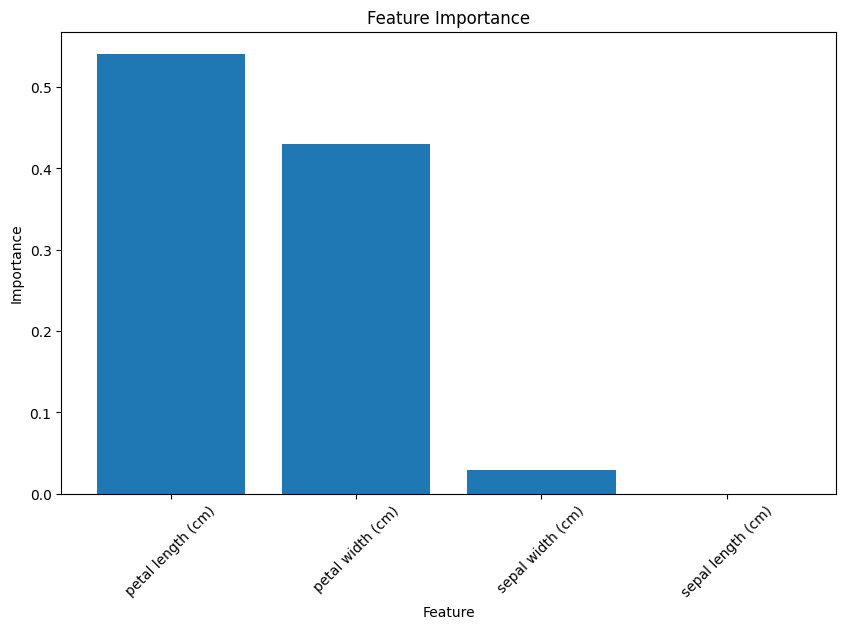

In [14]:
# Exibir como tabela ordenada
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': clf.feature_importances_})
imp_df = imp_df.sort_values('Importance', ascending=False)
display(imp_df)

#Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(imp_df['Feature'], imp_df['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)

## 7) Efeito do `max_depth` na acurácia

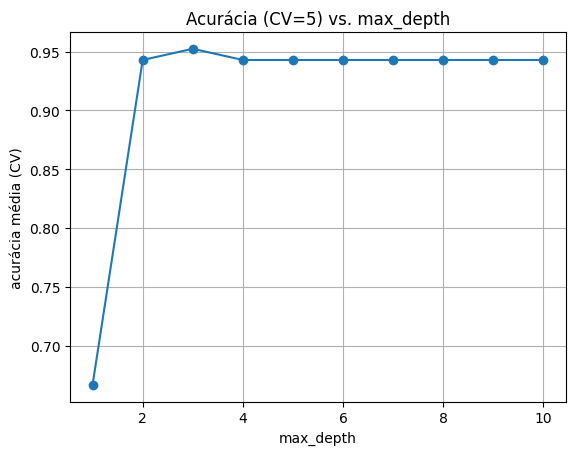

Melhor max_depth (nesta varredura simples): 3 | Acurácia CV = 0.952


In [25]:
depths = range(1, 11)
scores = []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    #validação cruzada simples
    cv_scores = cross_val_score(model, X_train, y_train, cv=5).mean()
    scores.append(cv_scores)

#Visualizar
plt.figure()
plt.plot(list(depths), scores, marker="o")
plt.title("Acurácia (CV=5) vs. max_depth")
plt.xlabel("max_depth")
plt.ylabel("acurácia média (CV)")
plt.grid(True)
plt.show()

best_d = depths[int(np.argmax(scores))]
print(f"Melhor max_depth (nesta varredura simples): {best_d} | Acurácia CV = {max(scores):.3f}")


## 8) GridSearchCV (tuning rápido)

In [26]:
param_grid = {
    "max_depth": [None, 2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4],
    "criterion": ["gini", "entropy"]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)
print("Melhores parâmetros:", grid.best_params_)
print("Acurácia (validação cruzada no treino):", round(grid.best_score_, 3))

# Reavaliar no conjunto de teste
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("\nAcurácia no teste (modelo tunado):", round(accuracy_score(y_test, y_pred_best), 3))

Melhores parâmetros: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2}
Acurácia (validação cruzada no treino): 0.952

Acurácia no teste (modelo tunado): 0.889


## 9) Conclusões
- Árvores são fáceis de **interpretar** e **visualizar**.
- Controle de **complexidade** (ex.: `max_depth`, `min_samples_leaf`, `ccp_alpha`) é essencial contra **overfitting**.
- Para melhor desempenho geral, experimente **Random Forest** e **Gradient Boosting** após dominar a árvore simples.